# MeasurementFramework Pre-work
The Measurement Framework creates and adds a Measurement Node to an experiment. This node is responsible for gathering monitoring metrics and logs. The Measurement Node also makes the gathered data available for analyzing. Grafana and Kibana are the primary means of interacting with the data.
Fabric experiment nodes are protected behind the Bastion host. To access Grafana or Kibana running on the Measurement Node, an SSH Tunnel must be created from the machine you are using, through the Bastion host and into the Measurement Node. 


## Running Jupyter Notebook on your local machine

If you are running Jupyter Notebook on your laptop or desktop, then your fabric_rc configuration file is all you need. No changes are necessary. See the configure_environment.ipynb notebook.

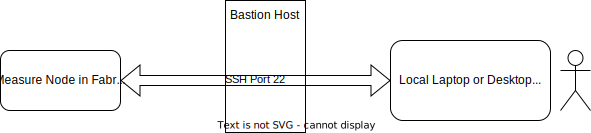

In [11]:
%%svg
<?xml version="1.0" encoding="UTF-8"?>
<!-- Do not edit this file with editors other than diagrams.net -->
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="591px" height="133px" viewBox="-0.5 -0.5 591 133" content="&lt;mxfile host=&quot;app.diagrams.net&quot; modified=&quot;2022-08-03T16:13:20.324Z&quot; agent=&quot;5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36&quot; etag=&quot;2LmGzr5nmyG9dNHB9KcA&quot; version=&quot;20.0.4&quot; type=&quot;google&quot;&gt;&lt;diagram id=&quot;Z1tLQ_z4JUPKda7FLoTv&quot; name=&quot;Page-1&quot;&gt;vVbbUtswEP2aPNLxBYf0EZIQhoHCkHZKHxV7sTXIXiOvE6dfXymWb1ESmA7tS7J7tLuWzp6VPfKnabWQLE/uMQIx8pyoGvmzkedNXEf9amBbA+fjoAZiyaMacjtgyX+DAU1eXPIIikEgIQri+RAMMcsgpAHGpMTNMOwFxfCpOYvBApYhEzb6k0eUmGMFToffAI+T5smuY1ZS1gQboEhYhJse5M9H/lQiUm2l1RSE5q7hpc67PrLabkxCRh9JCL4vEo9W62whvQcxfgpe5nj2ta6yZqI0B75iBXHMFHiDBZmt07bhQ2KZRaBLOiP/apNwgmXOQr26UQJQWEKpUJ6rzDVI4orLS8HjTGGEOsDeuDmLDoeqB5mDLABTILlVIWbVnxgVGVW5viF50+uRgZJ+e3zPSMPIIm5Ld8wpw5B3mEg5ZRexfKh+vL0F26fb/HbxEJ+dW0QulzcKeESpSHQ8z2JS6SHX5ouA6lIrVVEDWWTMWShYUfBQgQUxSTbc43nYFKg4PZsVbf/S+JfAeLOqFzbbNk6mSHjuO70s7XZpO6/JO9pLiAZzZXey16l2ZgatakAJghFfD+fxUP/MMx6RZ9RJpdWBkUp7szQlCixlCCarPz97hYLgnUKqTTGQVWgnp/bgH1LYwVH1LYUdlVSZisuQUPZG8I6tQDxiwXfD7c9WSITp0RntiQtLEjyDaXvBnuz7x2f4whvy6U7sGfYPCGO8R/vfjPBBgu0RvkNFjILuWK5p8RxFqefMoHjduWOhtnS1Utg41tZtmW8JdMg3JFghvp64Pt33r89PIHlftO6FTbI7PsDy5F+xPLFYvgdWlBJ2tEX6j+u3zzVbSXXPec68ykHyFLJTL6P/w2bL1AnJut7naFa53bdBfYd0H1j+/A8=&lt;/diagram&gt;&lt;/mxfile&gt;"><defs/><g><rect x="225" y="0" width="80" height="132" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe flex-start; justify-content: unsafe center; width: 78px; height: 1px; padding-top: 7px; margin-left: 226px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">Bastion Host</div></div></div></foreignObject><text x="265" y="19" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Bastion Host</text></switch></g><path d="M 139.5 85 L 139.5 95.5 L 120.5 80 L 139.5 64.5 L 139.5 75 L 370.5 75 L 370.5 64.5 L 389.5 80 L 370.5 95.5 L 370.5 85 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 1px; height: 1px; padding-top: 80px; margin-left: 255px;"><div data-drawio-colors="color: rgb(0, 0, 0); background-color: rgb(255, 255, 255); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 11px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; background-color: rgb(255, 255, 255); white-space: nowrap;">SSH Port 22</div></div></div></foreignObject><text x="255" y="83" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="11px" text-anchor="middle">SSH Port 22</text></switch></g><ellipse cx="575" cy="57.5" rx="7.5" ry="7.5" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><path d="M 575 65 L 575 90 M 575 70 L 560 70 M 575 70 L 590 70 M 575 90 L 560 110 M 575 90 L 590 110" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/><rect x="390" y="40" width="160" height="80" rx="12" ry="12" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 158px; height: 1px; padding-top: 80px; margin-left: 391px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">Local Laptop or Desktop<br />Jupyter Notebook</div></div></div></foreignObject><text x="470" y="84" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Local Laptop or Desktop...</text></switch></g><rect x="0" y="50" width="120" height="60" rx="9" ry="9" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 80px; margin-left: 1px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">Measure Node in Fabric Experiment</div></div></div></foreignObject><text x="60" y="84" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Measure Node in Fabr...</text></switch></g></g><switch><g requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility"/><a transform="translate(0,-5)" xlink:href="https://www.diagrams.net/doc/faq/svg-export-text-problems" target="_blank"><text text-anchor="middle" font-size="10px" x="50%" y="100%">Text is not SVG - cannot display</text></a></switch></svg>

## Running Jupyter Notebook on Fabric's Jupyter Hub web site

If you are running your notebook on the [Fabric Jupyter Hub site](https://jupyter.fabric-testbed.net/) you will need to have a copy of your SSH keys on both Jupyter Hub and your laptop. This is because both your local machine and Fabric Jupyter Hub need to access your nodes via the Bastion host and they are running on two different machines.

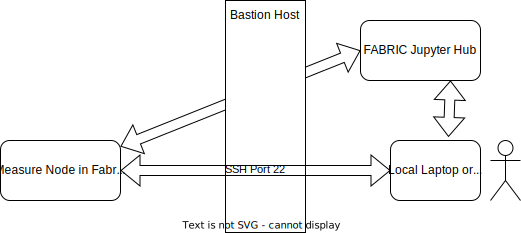

In [8]:
%%svg
<?xml version="1.0" encoding="UTF-8"?>
<!-- Do not edit this file with editors other than diagrams.net -->
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="521px" height="233px" viewBox="-0.5 -0.5 521 233" content="&lt;mxfile host=&quot;app.diagrams.net&quot; modified=&quot;2022-08-03T16:09:00.229Z&quot; agent=&quot;5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36&quot; etag=&quot;ekxWhebOW41-w7cxoZgv&quot; version=&quot;20.0.4&quot; type=&quot;google&quot;&gt;&lt;diagram id=&quot;Z1tLQ_z4JUPKda7FLoTv&quot; name=&quot;Page-1&quot;&gt;7VdNc9owEP01HMPYMnbIkQCBZpKGCc00PQq8sTWVLUeWwfTXV8LyNzhpmpAeemG0z9Jaevue1vSscZDOOI78W+YC7SHDTXvWpIfQ0DTkrwJ2GTBw7AzwOHEzyCyBJfkFGtTrvIS4ENcmCsaoIFEdXLMwhLWoYZhztq1Pe2K0/tYIe9AClmtM2+h34gpfH8s2SnwOxPPzN5uGfhLgfLIGYh+7bFuBrGnPGnPGRDYK0jFQxV3OS7bu6sjTYmMcQvGaBfa3mY/EahPOOLqjzr39NGVnpq7GBtNEn1jvVuxyCuTGIzV8opCOFKU96xJCVw8na4rjmKwlGAvMRRv2RUAlYMohZ0nogtqQsU8i+O6xGvxQQd/Ow0lafTjZ6ah9ck1GzBK+ho7jDrWCMPdAdNFiZRPBralDEzsDFoDckJywLTVRVN6v6iEHOVAsyKauKqzF6RUJi3csGJGHQ4b2keXoPNpG6Nyop8iOrldVVdBINGgkMpuJMm5aieSgcvAS2ovsDwR30dLbJY4FYaEE5ywWLfXVJbP1iYBlhPdV3sobp66vDXBBpHlHlHihxASLuvSipkPaWeCc/6Fdo22gWavUf3ig/MhCxytdo7aDRz7G5x6/Sx+en+3d/XV0PbvzzgYtHpfLuQQWjKtqn9TGKRGP+okaV0wso9LDKsgt/O7W/2ecWuggd6r5Rqfa9guJPtip1us7QxLQ0VowXnHgDV4BXbCY7L1tTVZMCBYctWhFXCwRlIQwLhp6Z91fb2Gnwac5bHvYOiAMp0H7Wyx8kOC2hW+YJEZCNzhStCBDUoqMCcQ/9+HRm9F8+WZ8BwKbgjxE4MUpCRy2CLwFHCccJPhVfoiq9aqvXOEVl1cYMqZpBJwEEHa1mdOQaTb78AEyTXRKNs224a9Gl/dfZDbjOol2ApQY58nq07mzUZ0759Opa1v5hO23aKX9c7vaTc0Xemnet42+MxhUeveZ0Tec7u4tg8XeSUoUf/tRrsn7/1H+AR/lMiz/YWbTy7/p1vQ3&lt;/diagram&gt;&lt;/mxfile&gt;"><defs/><g><path d="M 139.96 143.4 L 143.86 153.15 L 120.46 145.81 L 132.35 124.37 L 136.25 134.12 L 340.04 52.6 L 336.14 42.85 L 359.54 50.19 L 347.65 71.63 L 343.75 61.88 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/><rect x="225" y="0" width="80" height="232" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe flex-start; justify-content: unsafe center; width: 78px; height: 1px; padding-top: 7px; margin-left: 226px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">Bastion Host</div></div></div></foreignObject><text x="265" y="19" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Bastion Host</text></switch></g><path d="M 139.5 175 L 139.5 185.5 L 120.5 170 L 139.5 154.5 L 139.5 165 L 370.5 165 L 370.5 154.5 L 389.5 170 L 370.5 185.5 L 370.5 175 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 1px; height: 1px; padding-top: 170px; margin-left: 255px;"><div data-drawio-colors="color: rgb(0, 0, 0); background-color: rgb(255, 255, 255); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 11px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; background-color: rgb(255, 255, 255); white-space: nowrap;">SSH Port 22</div></div></div></foreignObject><text x="255" y="173" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="11px" text-anchor="middle">SSH Port 22</text></switch></g><ellipse cx="505" cy="147.5" rx="7.5" ry="7.5" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><path d="M 505 155 L 505 180 M 505 160 L 490 160 M 505 160 L 520 160 M 505 180 L 490 200 M 505 180 L 520 200" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/><rect x="390" y="140" width="90" height="60" rx="9" ry="9" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 88px; height: 1px; padding-top: 170px; margin-left: 391px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">Local Laptop or Desktop</div></div></div></foreignObject><text x="435" y="174" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Local Laptop or...</text></switch></g><rect x="0" y="140" width="120" height="60" rx="9" ry="9" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 170px; margin-left: 1px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">Measure Node in Fabric Experiment</div></div></div></foreignObject><text x="60" y="174" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Measure Node in Fabr...</text></switch></g><rect x="360" y="20" width="120" height="60" rx="9" ry="9" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" pointer-events="all"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 50px; margin-left: 361px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: normal; overflow-wrap: normal;">FABRIC Jupyter Hub</div></div></div></foreignObject><text x="420" y="54" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">FABRIC Jupyter Hub</text></switch></g><path d="M 453.66 117.09 L 464.15 117.47 L 447.98 135.9 L 433.17 116.35 L 443.67 116.73 L 444.3 99.31 L 433.81 98.93 L 449.98 80.5 L 464.79 100.05 L 454.29 99.67 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/></g><switch><g requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility"/><a transform="translate(0,-5)" xlink:href="https://www.diagrams.net/doc/faq/svg-export-text-problems" target="_blank"><text text-anchor="middle" font-size="10px" x="50%" y="100%">Text is not SVG - cannot display</text></a></switch></svg>

## Configuring Fabric Jupyter Hub
See the configure_environment.ipynb notebook. Once you have set those configurations you will need to add the following to the fabric_rc file in the Fabric Jupyterhub:
```
export FABRIC_ALT_COPY_SSH_CONFIG=<path-to-ssh-config-file-on-local-machine>
export FABRIC_ALT_COPY_SLICE_PRIVATE_KEY_FILE=<path-to-slice-private-key-file-on-local-machine>
```

## Configuring Local Machine
Your local machine (laptop or desktop etc..) will need copies of the Fabric slice private key found at FABRIC_SLICE_PRIVATE_KEY_FILE and the Fabric Bastion private key found at FABRIC_BASTION_PRIVATE_KEY_LOCATION. Also copy the '~/work/fabric_config/ssh_config' to your local machine. Change the FABRIC_BASTION_PRIVATE_KEY_LOCATION to point to the copy of the key on your local machine.